In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

In [2]:
def     data_frame(pair_name):
    folder_path=f"C:\\Users\\manch\\OneDrive\\Documents\\dev\\Trading\\Synthetics\\Step_index\\data_files\\labeled"
    file        =   folder_path+f"\\{pair_name}"
    df          =   pd.read_csv(file,sep=' ')
    return df

In [3]:
df=data_frame(pair_name="dfUltimate_Moving Average Trends_STEP_INDEX_M1_9_3.0_99970.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99970 entries, 0 to 99969
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time Stamps          99970 non-null  object 
 1   Instance             99970 non-null  int64  
 2   Trunced Closes       99970 non-null  float64
 3   Trunced Ma           99970 non-null  float64
 4   Ma Close Diff        99970 non-null  float64
 5   Linear Reg Slope     99970 non-null  float64
 6   Trend Change         99970 non-null  float64
 7   truncedWPR           99970 non-null  float64
 8   truncedCCI           99970 non-null  float64
 9   truncedMBand         99970 non-null  float64
 10  truncedUBand         99970 non-null  float64
 11  truncedLBand         99970 non-null  float64
 12  diffsFromTop         99970 non-null  float64
 13  diffsFromBot         99970 non-null  float64
 14  truncedRSI           99970 non-null  float64
 15  diffsFromMid         99970 non-null 

In [4]:
df.describe()

,Instance,Trunced Closes,Trunced Ma,Ma Close Diff,Linear Reg Slope,Trend Change,truncedWPR,truncedCCI,truncedMBand,truncedUBand,truncedLBand,diffsFromTop,diffsFromBot,truncedRSI,diffsFromMid,Slope Ma,Slope Ma Close diff,Slope Trend,Slope Linear Reg
count,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,99970.000000,9.997000e+04
mean,49985.500000,8148.247316,8148.248802,-0.001485,-0.000006,0.008826,-50.115596,-0.490680,8148.251423,8150.872324,8145.630522,-2.625008,2.616794,49.974463,-0.004107,-0.000383,0.000015,-0.000010,5.871762e-08
std,28858.997543,69.041685,69.037014,1.289189,0.003942,3.014471,38.423313,117.818424,69.028705,69.036605,69.037773,2.342987,2.349578,14.123024,2.081770,0.285711,0.826341,1.814209,1.241177e-03
min,1.000000,7986.900000,7988.255200,-5.299260,-0.016680,-20.400000,-100.000000,-406.432750,7989.640000,7992.391290,7986.752940,-18.886660,-3.506710,4.591610,-9.730000,-1.222020,-3.427670,-20.000000,-5.200000e-03
25%,24993.250000,8100.600000,8100.569312,-0.870935,-0.002630,-1.600000,-90.000000,-98.904782,8100.550000,8103.207865,8097.844375,-3.857603,0.962005,40.001802,-1.400000,-0.192320,-0.560727,-0.600000,-8.400000e-04
50%,49985.500000,8137.900000,8137.879450,-0.002260,0.000000,0.000000,-50.000000,-1.741025,8137.840000,8140.395085,8135.272630,-2.213560,2.194910,49.952775,-0.010000,-0.001320,-0.001320,0.000000,0.000000e+00
75%,74977.750000,8193.600000,8193.694658,0.867837,0.002630,1.600000,-10.000000,97.250620,8193.690000,8196.381265,8190.625297,-0.976023,3.849183,59.978535,1.390000,0.191997,0.559667,0.600000,8.400000e-04
max,99970.000000,8310.600000,8309.776970,5.643770,0.017660,19.200000,-0.000000,432.282000,8308.880000,8312.233190,8306.566910,3.722480,16.857750,93.964220,9.290000,1.305260,3.681510,21.200000,5.570000e-03


In [5]:
y=df["Peak"]
df.pop("Peak")
df.pop("Time Stamps")
df.pop("Trunced Closes")
df.pop("Trunced Ma")
df.pop("truncedMBand")
df.pop("truncedUBand")
df.pop("truncedLBand")
df.pop("Instance")
X=df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99970 entries, 0 to 99969
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ma Close Diff        99970 non-null  float64
 1   Linear Reg Slope     99970 non-null  float64
 2   Trend Change         99970 non-null  float64
 3   truncedWPR           99970 non-null  float64
 4   truncedCCI           99970 non-null  float64
 5   diffsFromTop         99970 non-null  float64
 6   diffsFromBot         99970 non-null  float64
 7   truncedRSI           99970 non-null  float64
 8   diffsFromMid         99970 non-null  float64
 9   Slope Ma             99970 non-null  float64
 10  Slope Ma Close diff  99970 non-null  float64
 11  Slope Trend          99970 non-null  float64
 12  Slope Linear Reg     99970 non-null  float64
dtypes: float64(13)
memory usage: 9.9 MB


In [6]:
X_train, X_test, y_train, y_test = X[:80000], X[80000:], y[:80000], y[80000:]

In [56]:
import numpy as np
V=np.cov(X_train.T)
VI=np.linalg.inv(V)
metrics=['p', 'precomputed', 'cityblock', 'chebyshev', 'pyfunc', 'infinity', 'euclidean', 'mahalanobis', 'l1', 'correlation', 'russellrao', 'sokalsneath', 'minkowski', 'braycurtis', 'rogerstanimoto', 'sokalmichener', 'l2', 'cosine', 'hamming', 'dice', 'seuclidean', 'haversine', 'manhattan', 'nan_euclidean', 'sqeuclidean', 'jaccard', 'canberra', 'yule']
clf=KNeighborsClassifier(n_neighbors=37,algorithm='auto',weights='uniform',leaf_size=69,metric=metrics[9],n_jobs=-1)
#clf=KNeighborsClassifier(n_neighbors=37,algorithm='auto',weights='distance',leaf_size=69,metric='mahalanobis',metric_params={'V':VI},n_jobs=-1) best
#clf=KNeighborsClassifier(n_neighbors=37,algorithm='auto',weights='distance',leaf_size=69,p=1,metric='hamming') good for falling recall
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("knnnn",classification_report(y_test,y_pred))

knnnn               precision    recall  f1-score   support

       crest       0.25      0.01      0.03      2080
     falling       0.74      0.95      0.83      7815
      rising       0.75      0.93      0.83      7995
      trough       0.41      0.01      0.03      2080

    accuracy                           0.75     19970
   macro avg       0.54      0.48      0.43     19970
weighted avg       0.66      0.75      0.67     19970



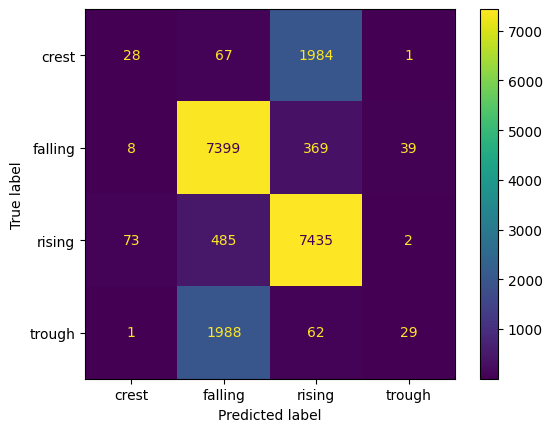

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

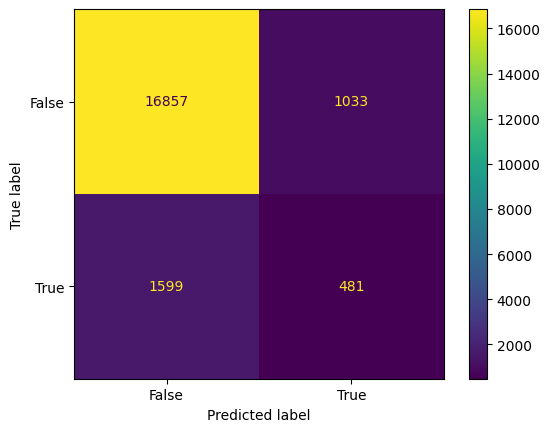

In [78]:
kclf=KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree',weights='distance',leaf_size=1,p=2,n_jobs=-1)
"""
kclf=GridSearchCV(KNeighborsClassifier(),{
                                            'n_neighbors':[1,2,11,20,37,42],
                                            'weights':['uniform', 'distance'],
                                            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                                            'leaf_size': [1,2,11,20,37,42],
                                            'p':[1,2,11,20,37,42]
                                         },cv=3,return_train_score=False)
"""
y_train_2=(y_train=='crest')
y_test_2=(y_test=='crest')
kclf.fit(X_train,y_train_2)
y_pred=kclf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred)
plt.show()

In [79]:
print(classification_report(y_pred,y_test_2))

              precision    recall  f1-score   support

       False       0.94      0.91      0.93     18456
        True       0.23      0.32      0.27      1514

    accuracy                           0.87     19970
   macro avg       0.59      0.62      0.60     19970
weighted avg       0.89      0.87      0.88     19970



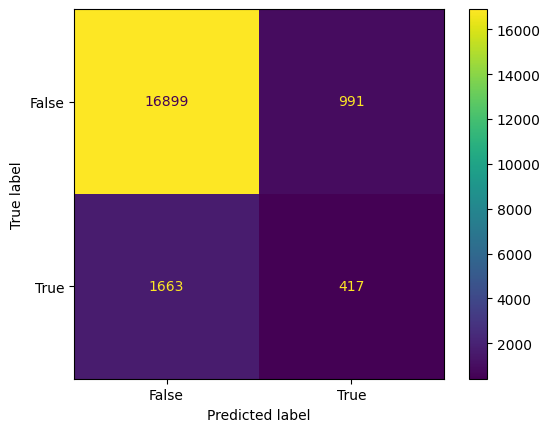

In [11]:
kclf=KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree',weights='distance',leaf_size=1,p=2)
y_train_2=(y_train=='trough')
y_test_2=(y_test=='trough')
kclf.fit(X_train,y_train_2)
y_pred=kclf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred)
plt.show()

In [80]:
print(classification_report(y_pred,y_test_2))

              precision    recall  f1-score   support

       False       0.94      0.91      0.93     18456
        True       0.23      0.32      0.27      1514

    accuracy                           0.87     19970
   macro avg       0.59      0.62      0.60     19970
weighted avg       0.89      0.87      0.88     19970



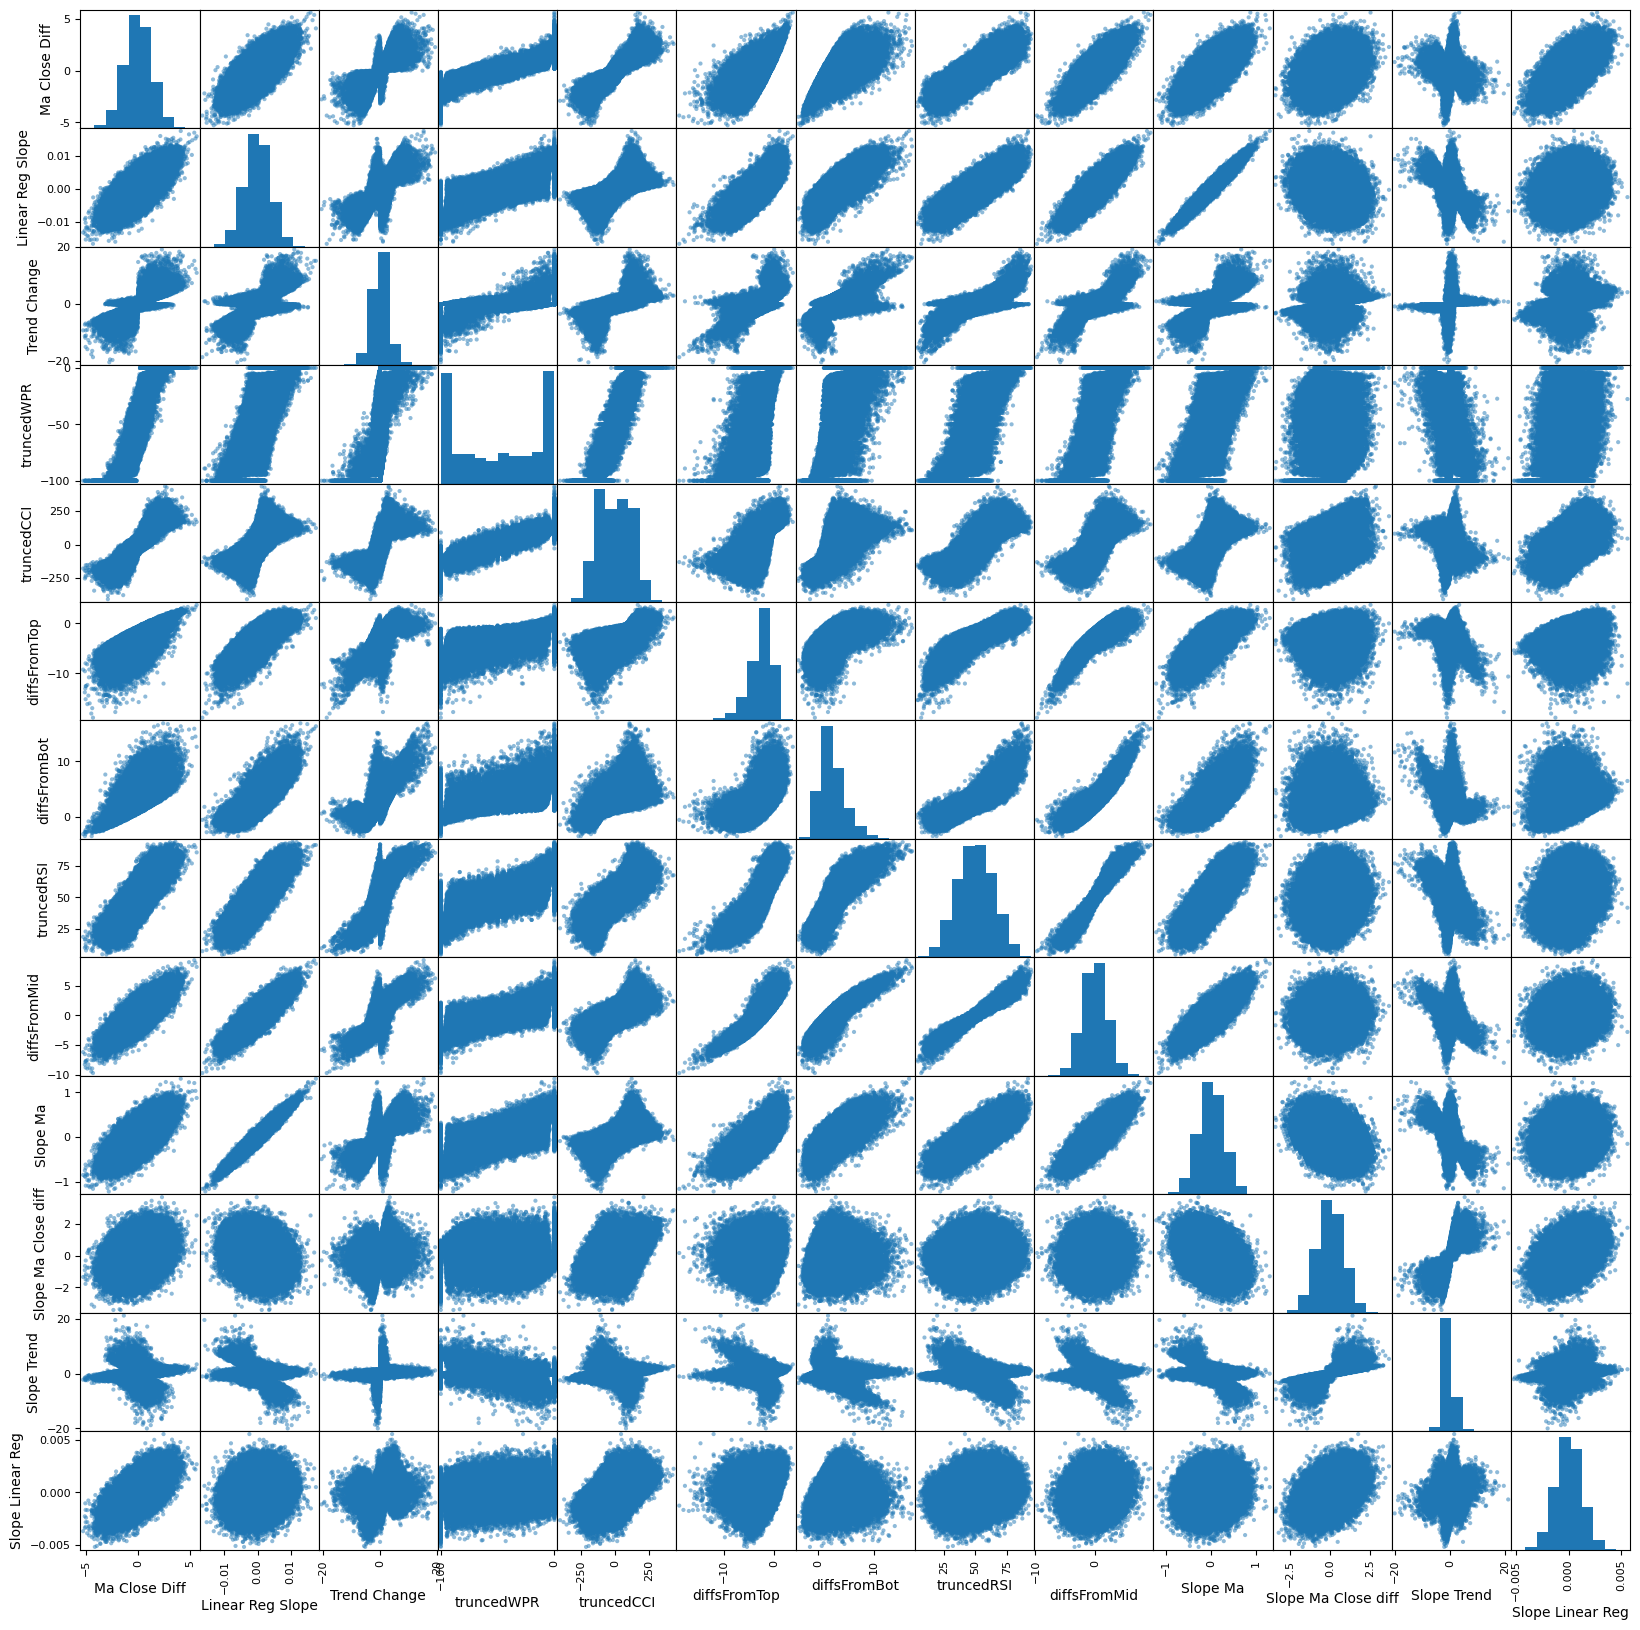

In [13]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20, 20))
plt.show()

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99970 entries, 0 to 99969
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trend Change  99970 non-null  float64
 1   Slope Ma      99970 non-null  float64
 2   Slope Trend   99970 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


In [93]:
"""
X.pop('Ma Close Diff')
X.pop('Linear Reg Slope')

X.pop('truncedWPR')
X.pop('truncedCCI')
X.pop('truncedRSI')
X.pop('diffsFromMid')
X.pop('diffsFromBot')
X.pop('diffsFromTop')

X.pop('Slope Ma Close diff')
X.pop('Slope Linear Reg')
"""


"\nX.pop('Ma Close Diff')\nX.pop('Linear Reg Slope')\n\nX.pop('truncedWPR')\nX.pop('truncedCCI')\nX.pop('truncedRSI')\nX.pop('diffsFromMid')\nX.pop('diffsFromBot')\nX.pop('diffsFromTop')\n\nX.pop('Slope Ma Close diff')\nX.pop('Slope Linear Reg')\n"

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99970 entries, 0 to 99969
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trend Change  99970 non-null  float64
 1   Slope Ma      99970 non-null  float64
 2   Slope Trend   99970 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


In [96]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X is your feature matrix and y is your target vector
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Create a grid of points
xx, yy, zz = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 50),
                         np.linspace(X[:, 2].min(), X[:, 2].max(), 50))

# Flatten the grid to pass it through the model
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
Z = clf.decision_function(grid)
Z = Z.reshape(xx.shape)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired)


# Plot the decision boundary
#ax.contour3D(xx, yy, zz, Z, levels=[0], colors='k', linewidths=2)
plt.show()


InvalidIndexError: (slice(None, None, None), 0)